In [1]:
import numpy as np
import pandas as pd 
import pandas_datareader as pdr 
import matplotlib.pyplot as plt
import yfinance as yf 
import seaborn as sns
import statsmodels as stm

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

In [3]:
AAPL = yf.download(tickers = ' MSFT ',start='2010-06-29')
MSFT = yf.download(tickers = ' AAPL ',start='2010-06-29')
AMZN = yf.download(tickers = ' TSLA ',start='2010-06-29')
NVDA = yf.download(tickers = ' AMZN ',start='2010-06-29')
GOOGL = yf.download(tickers = ' NVDA ',start='2010-06-29')
TSLA = yf.download(tickers = ' GOOGL ',start='2010-06-29')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
ticker_list = ['MSFT', 'AAPL', 'TSLA', 'AMZN', 'NVDA', 'GOOGL']
asset_list = [MSFT, AAPL, TSLA, AMZN, NVDA, GOOGL]

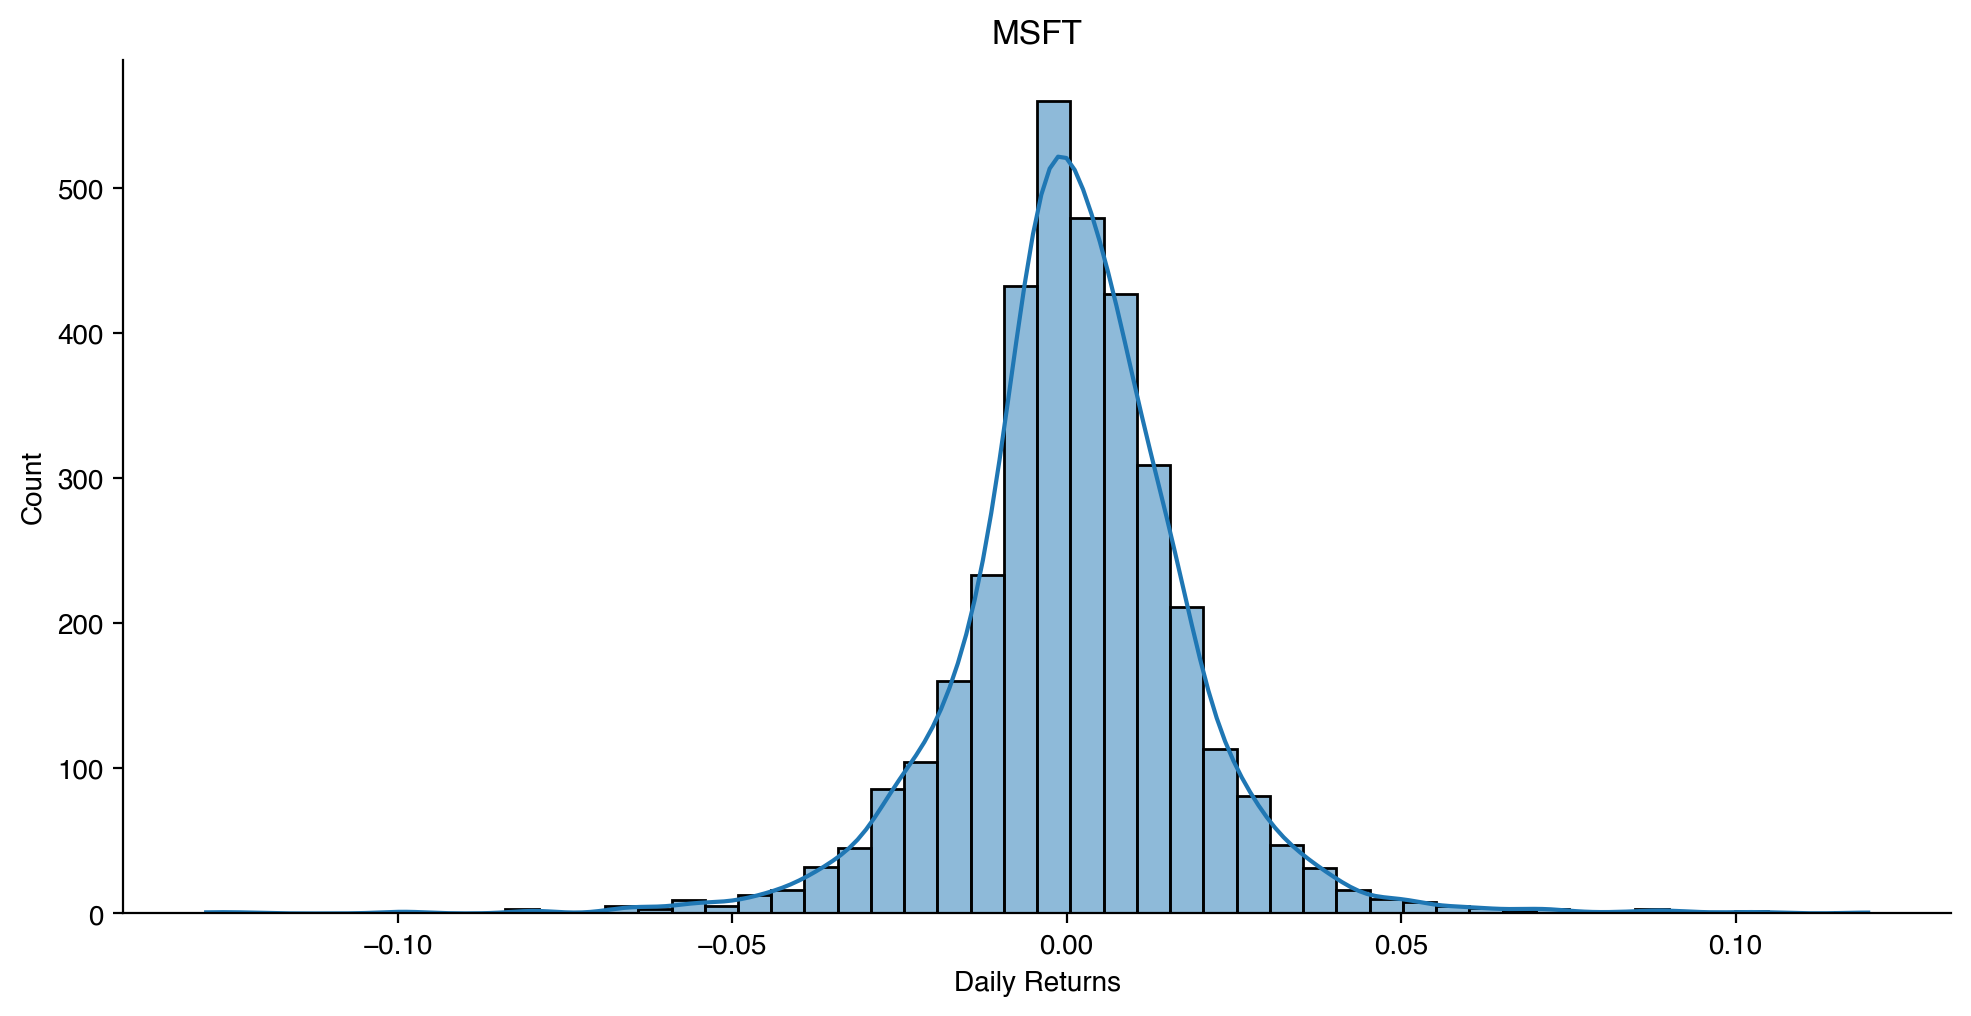

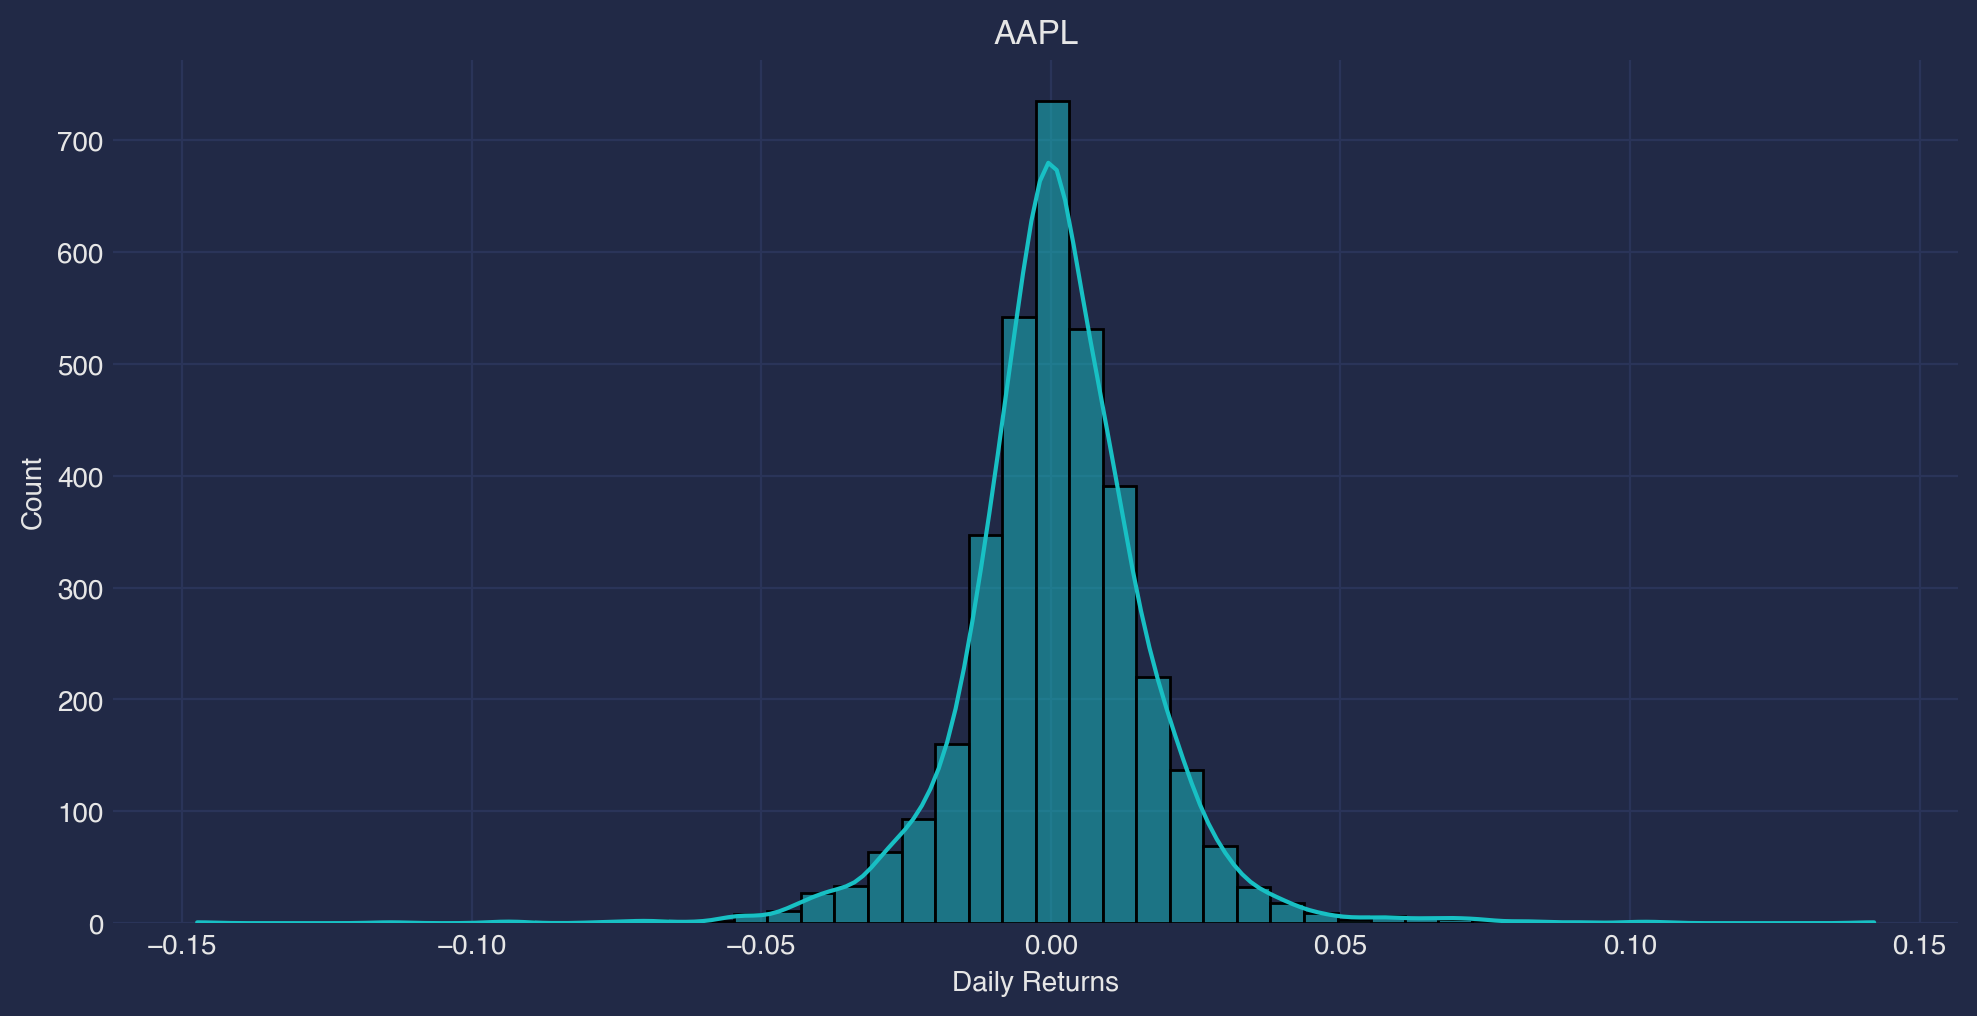

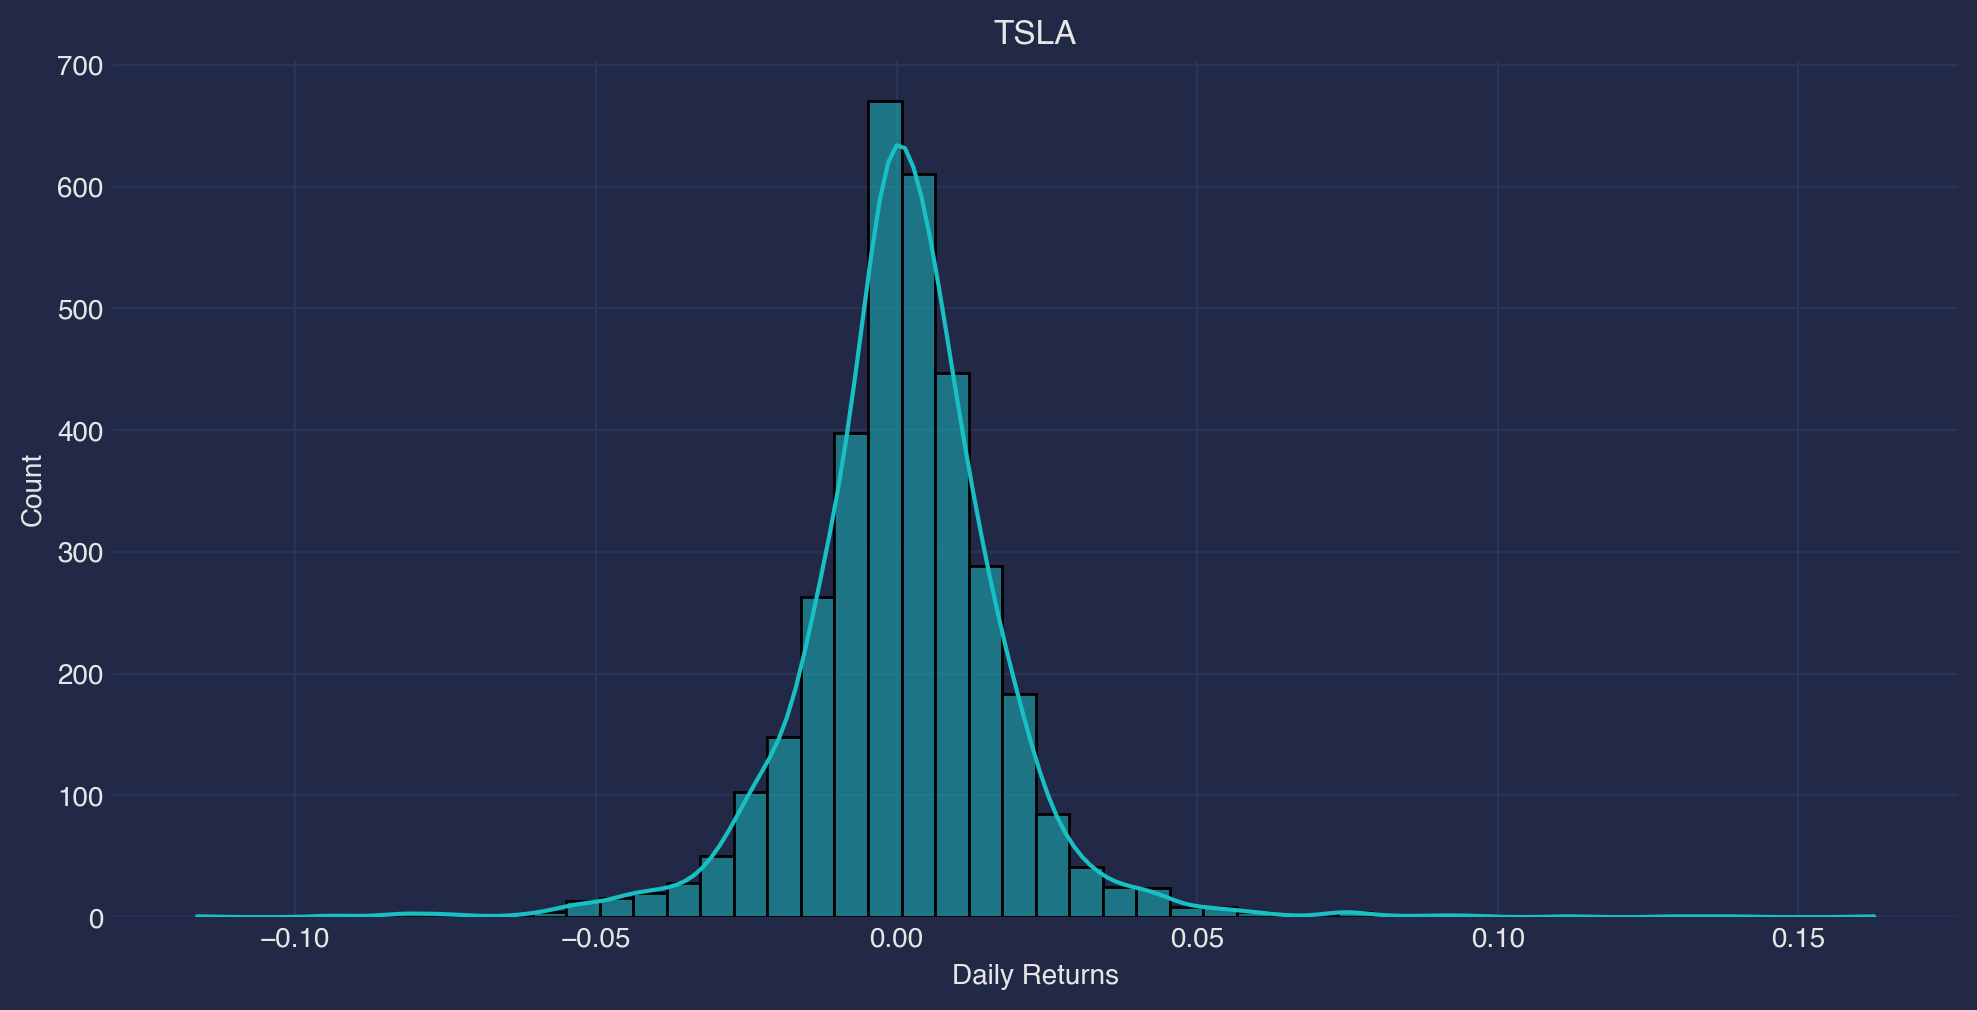

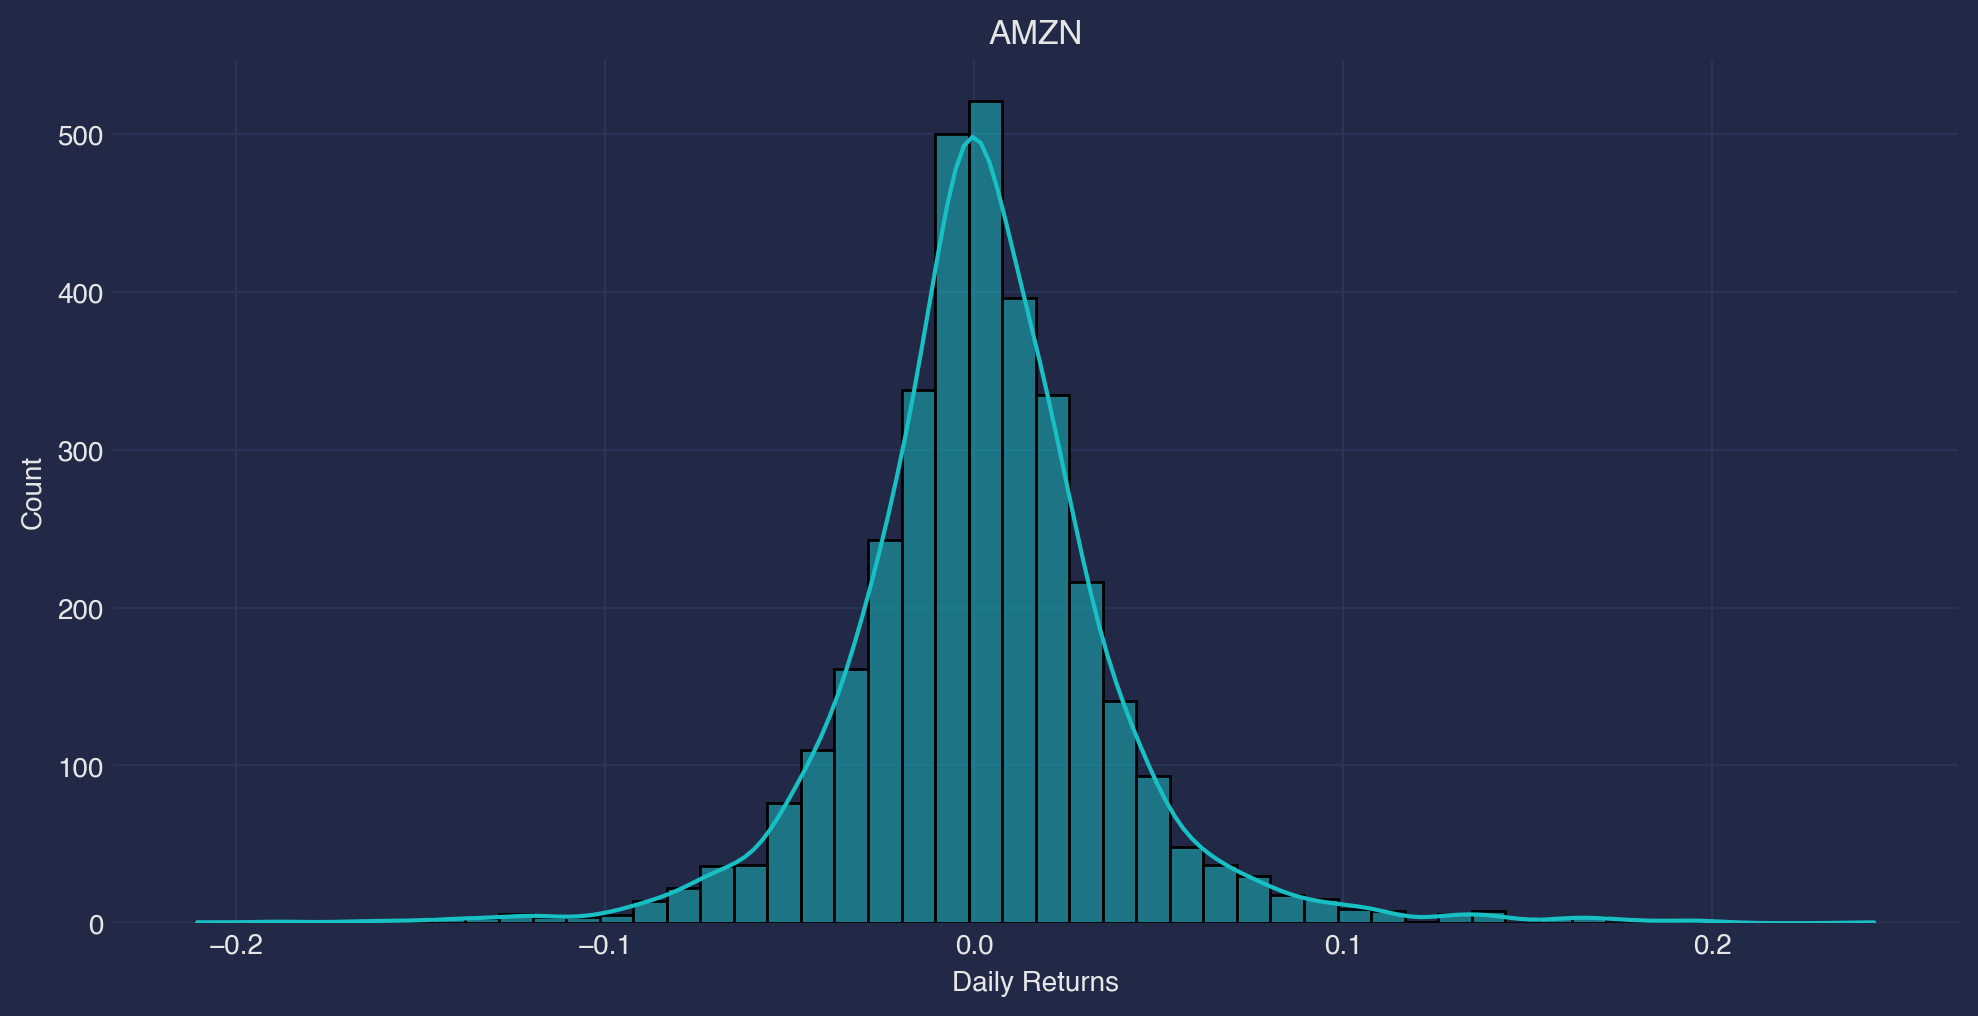

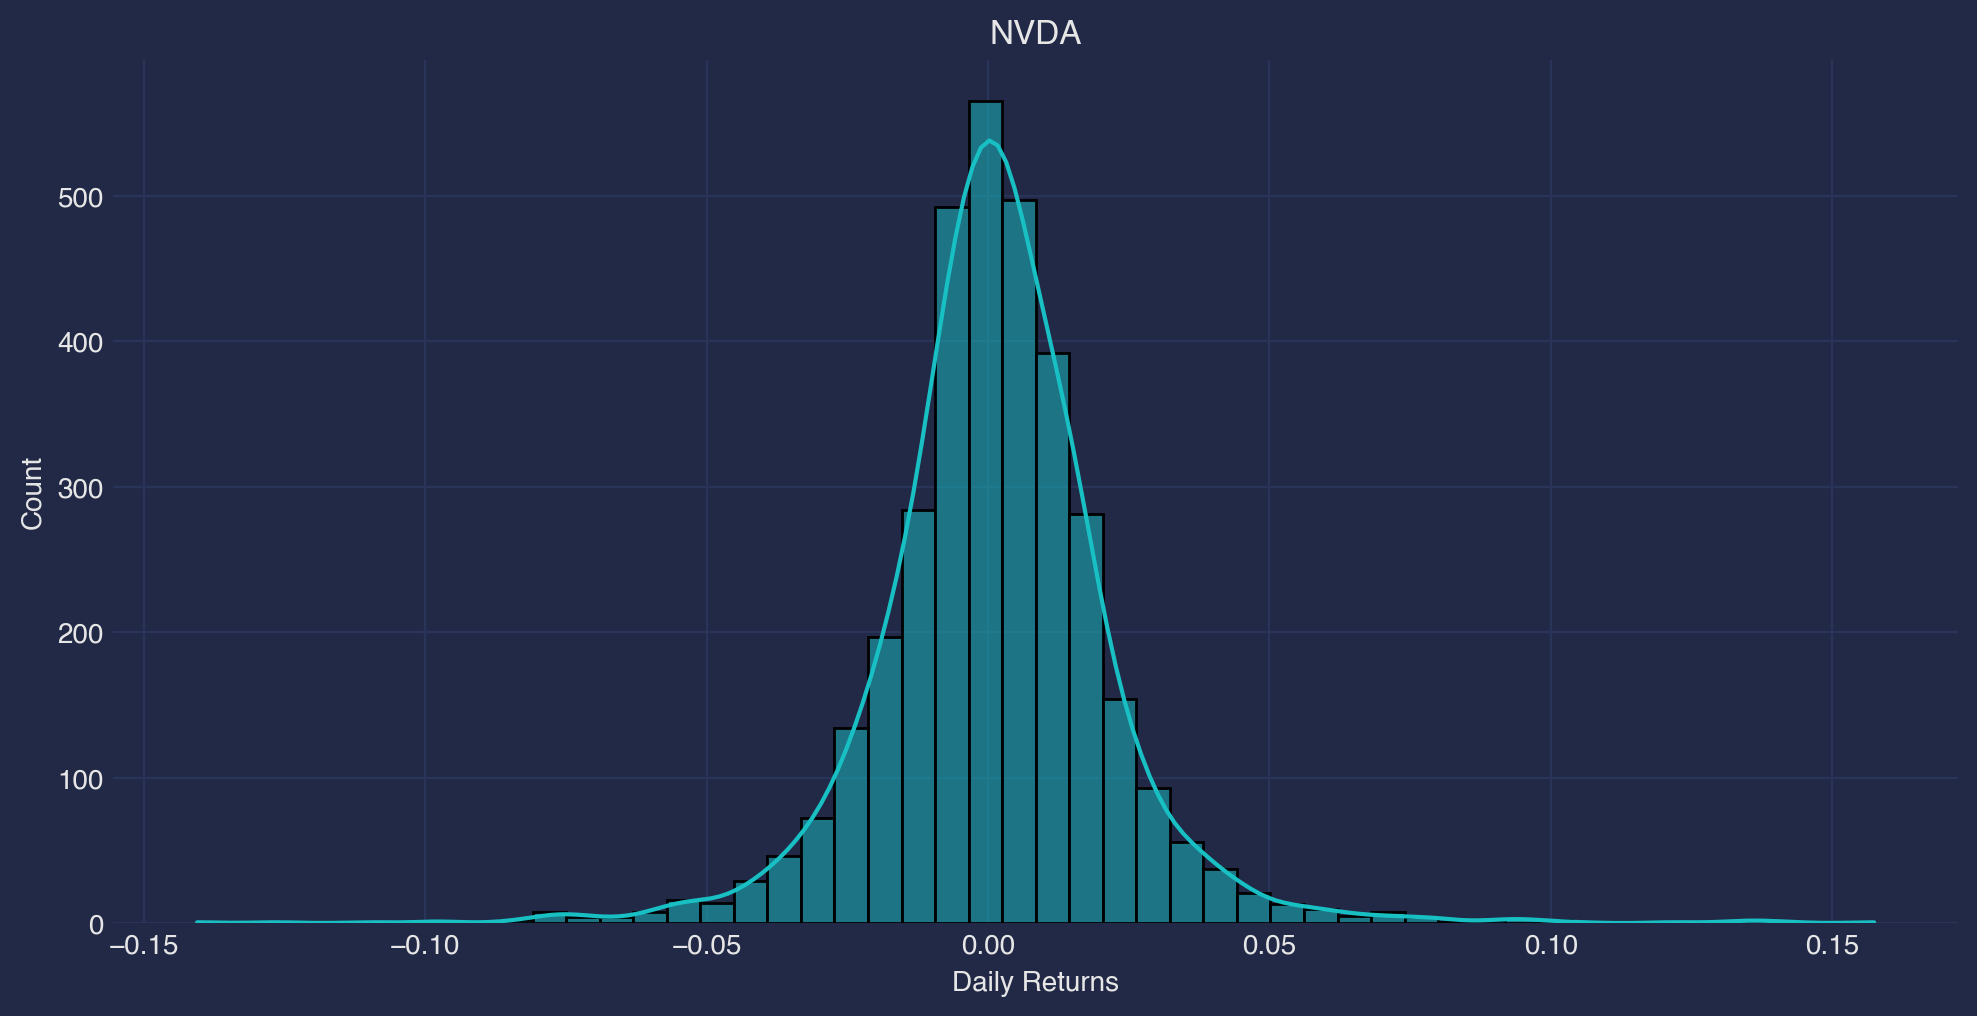

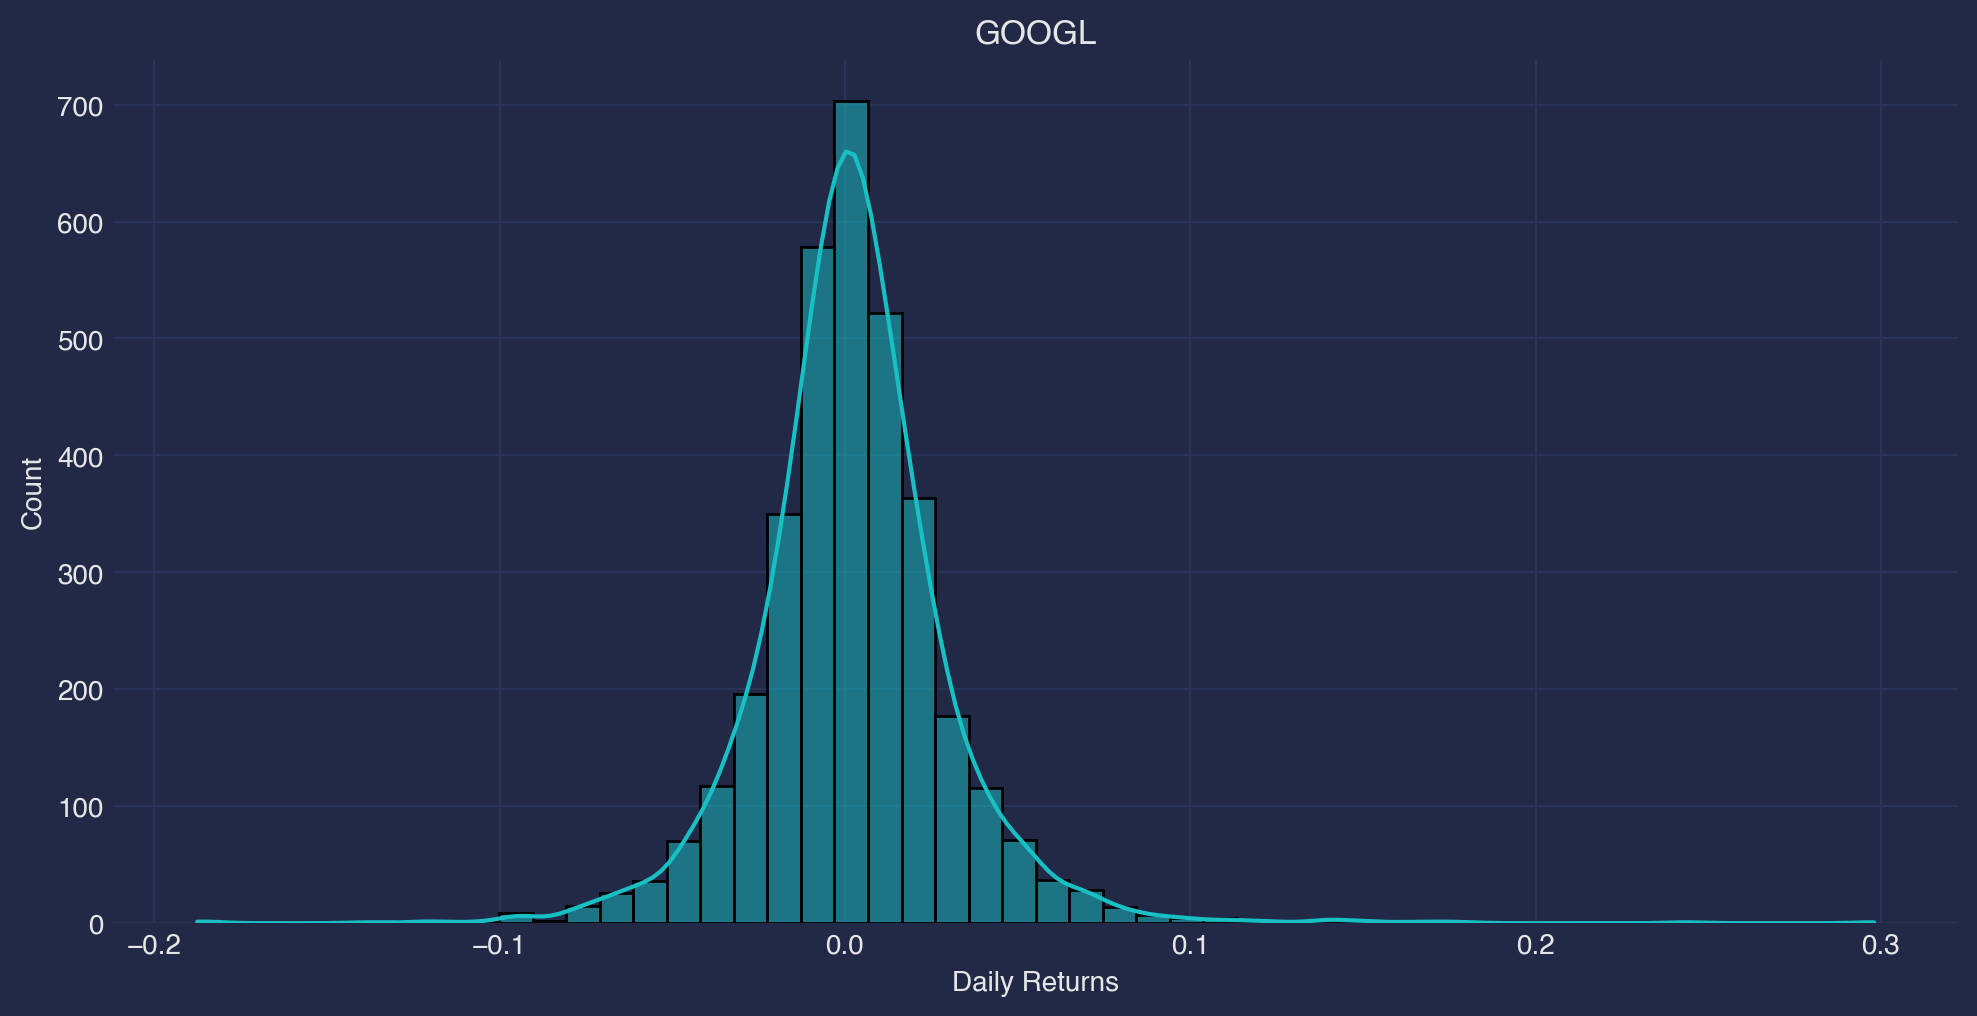

In [5]:
for i in range(len(asset_list)):
    asset_list[i]['Daily Returns'] = asset_list[i]['Adj Close'].pct_change()
    sns.displot(asset_list[i]['Daily Returns'].dropna(), bins=50, kde=True, height=5, aspect=2)
    plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/'
              'pitayasmoothie-dark.mplstyle')
    plt.title(ticker_list[i])
    plt.show()

In [6]:
daily_returns = [data['Daily Returns'] for data in asset_list]
stock_returns = pd.concat(daily_returns, axis=1)
stock_returns.columns = ticker_list

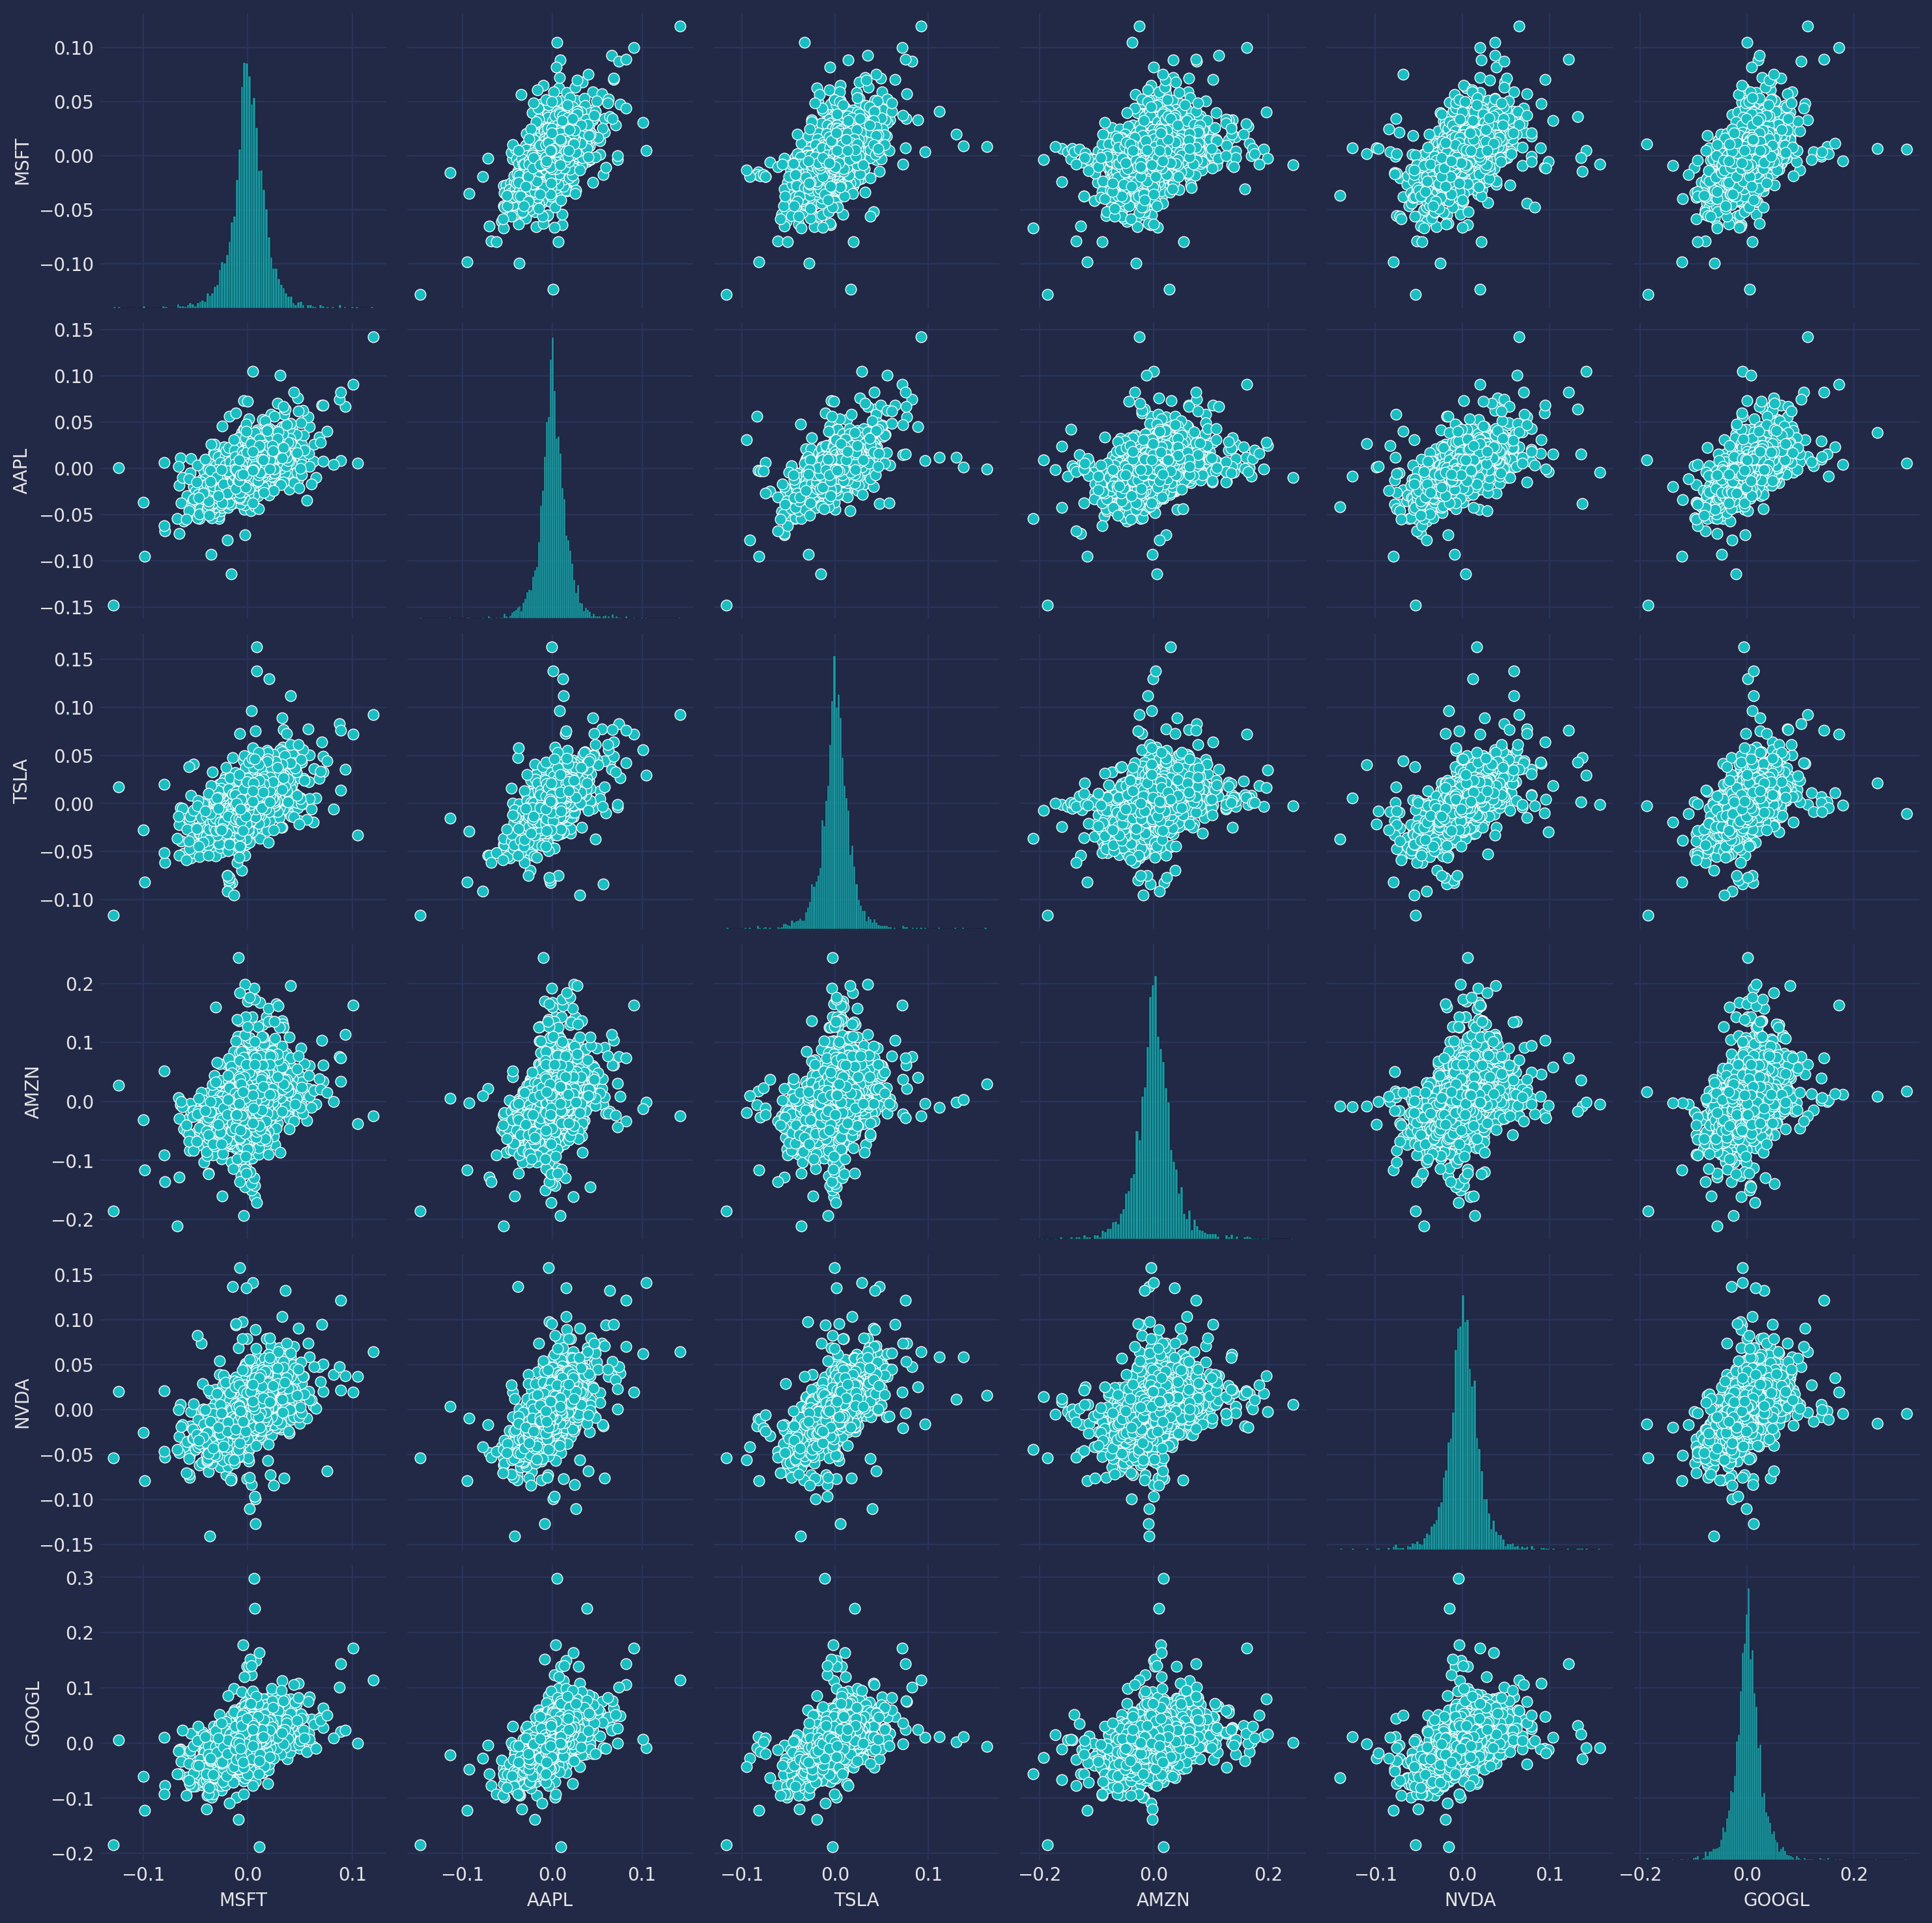

In [7]:
sns.pairplot(stock_returns.dropna())
plt.style.use('default')

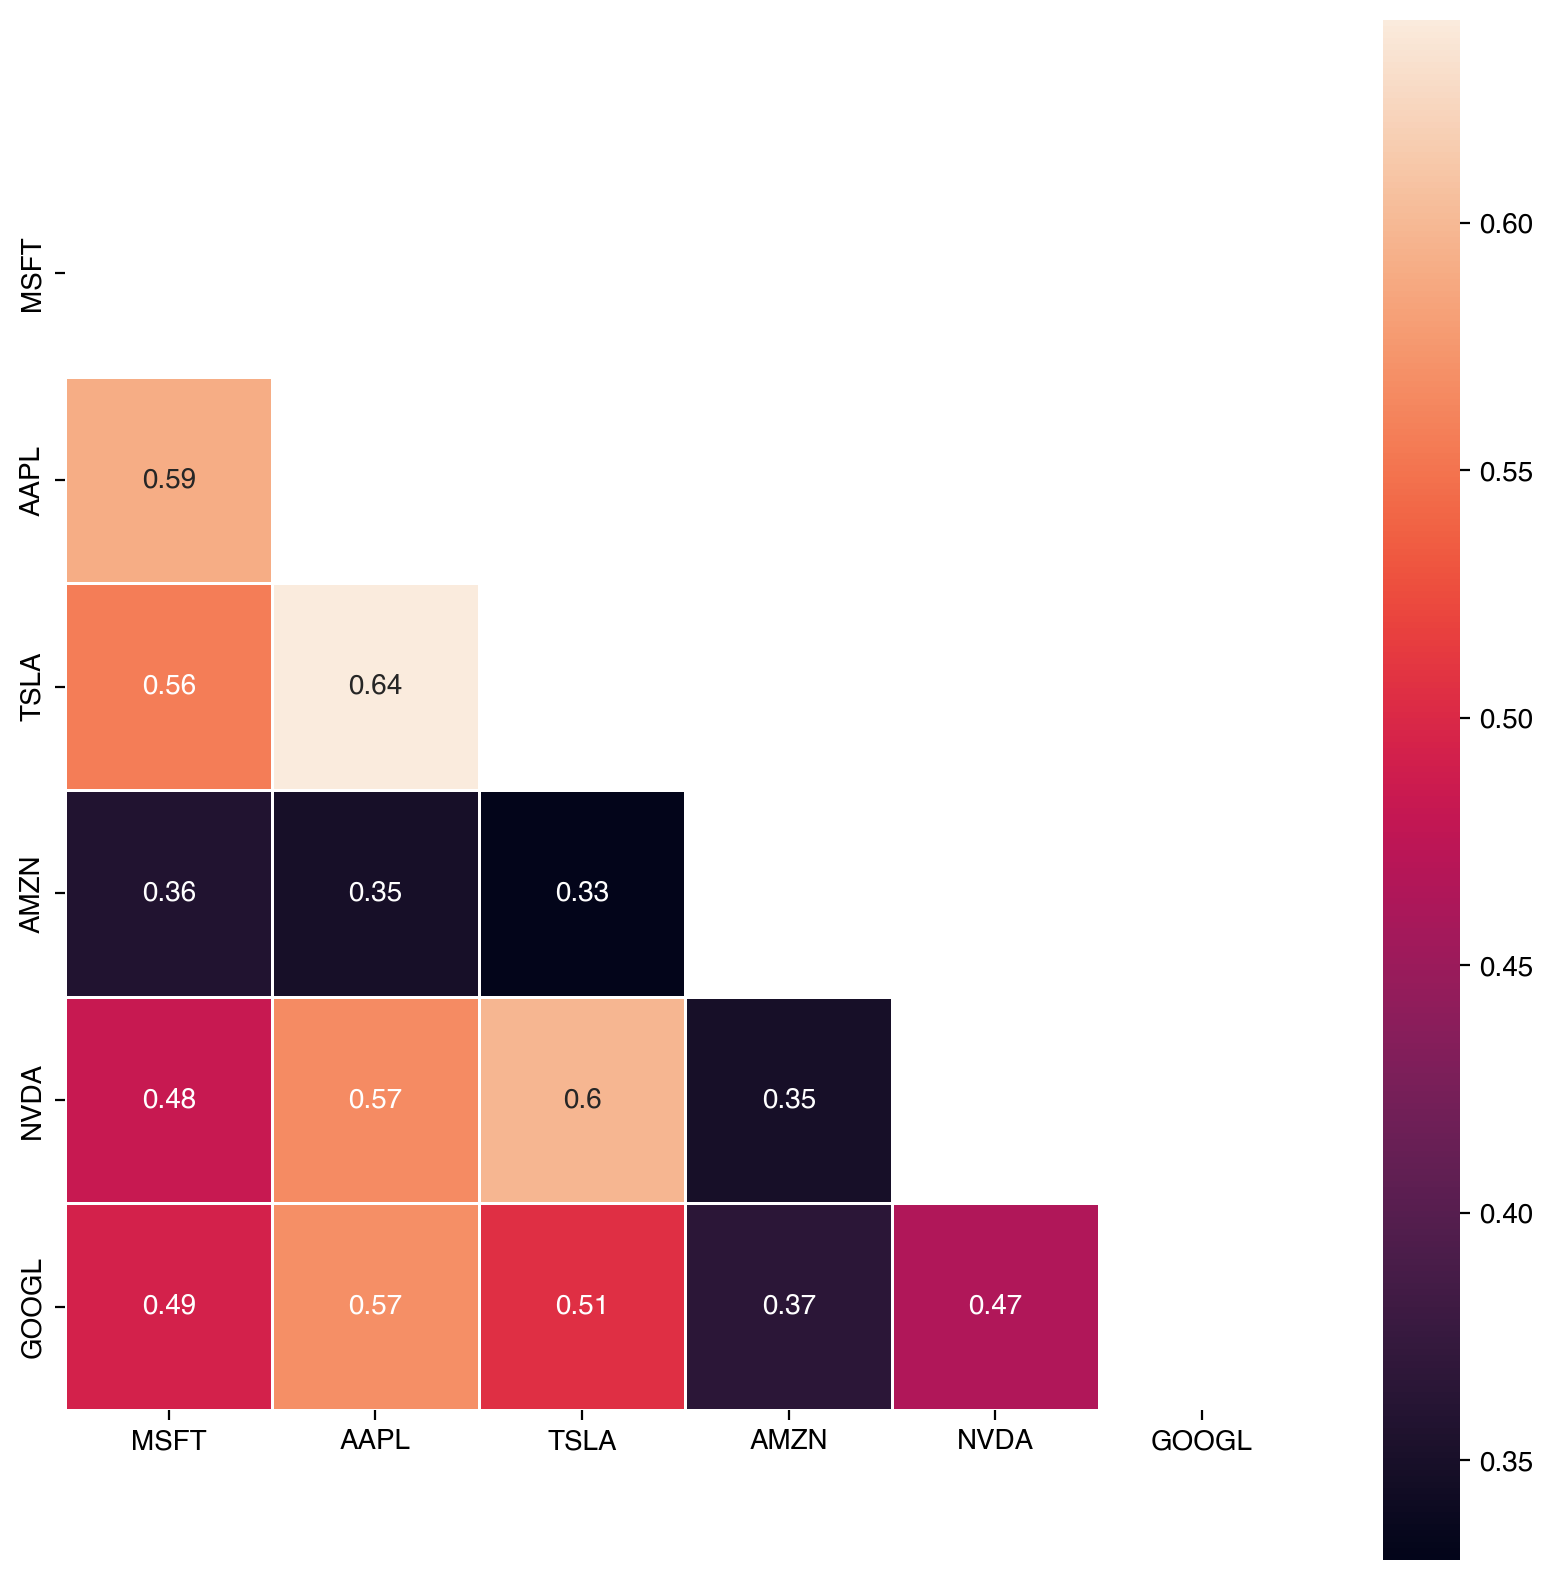

In [8]:
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/'
              'pitayasmoothie-dark.mplstyle')
plt.show()

In [9]:
mean_returns = stock_returns.mean()
cov_returns = stock_returns.cov()
count = len(stock_returns.columns)

In [10]:
df = yf.download(['MSFT', 'AAPL', 'TSLA', 'AMZN', 'NVDA', 'GOOGL'], start='2010-06-29')
df.head()

[*********************100%%**********************]  6 of 6 completed


Adj Close                                       Close         \
                AAPL   AMZN   GOOGL    MSFT   NVDA   TSLA   AAPL   AMZN   
Date                                                                      
2010-06-29    7.7455 5.4305 11.3679 17.8100 2.4033 1.5927 9.1489 5.4305   
2010-06-30    7.6052 5.4630 11.1349 17.5808 2.3414 1.5887 8.9832 5.4630   
2010-07-01    7.5130 5.5480 10.9982 17.6954 2.3804 1.4640 8.8743 5.5480   
2010-07-02    7.4664 5.4570 10.9247 17.7795 2.3506 1.2800 8.8193 5.4570   
2010-07-06    7.5175 5.5030 10.9127 18.1997 2.3254 1.0740 8.8796 5.5030   

                            ...    Open                            Volume  \
             GOOGL    MSFT  ...   GOOGL    MSFT   NVDA   TSLA        AAPL   
Date                        ...                                             
2010-06-29 11.3679 23.3100  ... 11.5976 24.1300 2.7150 1.2667  1133344800   
2010-06-30 11.1349 23.0100  ... 11.3854 23.3000 2.6250 1.7193   739452000   
2010-07-01 10.9982 23.1600  ... 11.1434 23.0900 2.5600 1.6667  1022896000   
2010-07-02 10.9247 23.2700  ... 11.0516 23.3600 2.6050 1.5333   693842800   
2010-07-06 10.9127 23.8200  ... 11.1111 23.7000 2.5525 1.3333   615235600   

                                                                  
                 AMZN      GOOGL       MSFT      NVDA       TSLA  
Date                                                              
2010-06-29  257326000  139943916  119882100  66080800  281494500  
2010-06-30  194814000  143983872   81050500  62307200  257806500  
2010-07-01  170596000  140403456   92239400  73700800  123282000  
2010-07-02   89542000   77362560   62485100  73709600   77097000  
2010-07-06  104386000  102301596   73592000  71202000  103003500  

[5 rows x 36 columns]

In [11]:
df = df['Adj Close']
df.head()

,AAPL,AMZN,GOOGL,MSFT,NVDA,TSLA
Date,,,,,,
2010-06-29,7.7455,5.4305,11.3679,17.8100,2.4033,1.5927
2010-06-30,7.6052,5.4630,11.1349,17.5808,2.3414,1.5887
2010-07-01,7.5130,5.5480,10.9982,17.6954,2.3804,1.4640
2010-07-02,7.4664,5.4570,10.9247,17.7795,2.3506,1.2800
2010-07-06,7.5175,5.5030,10.9127,18.1997,2.3254,1.0740


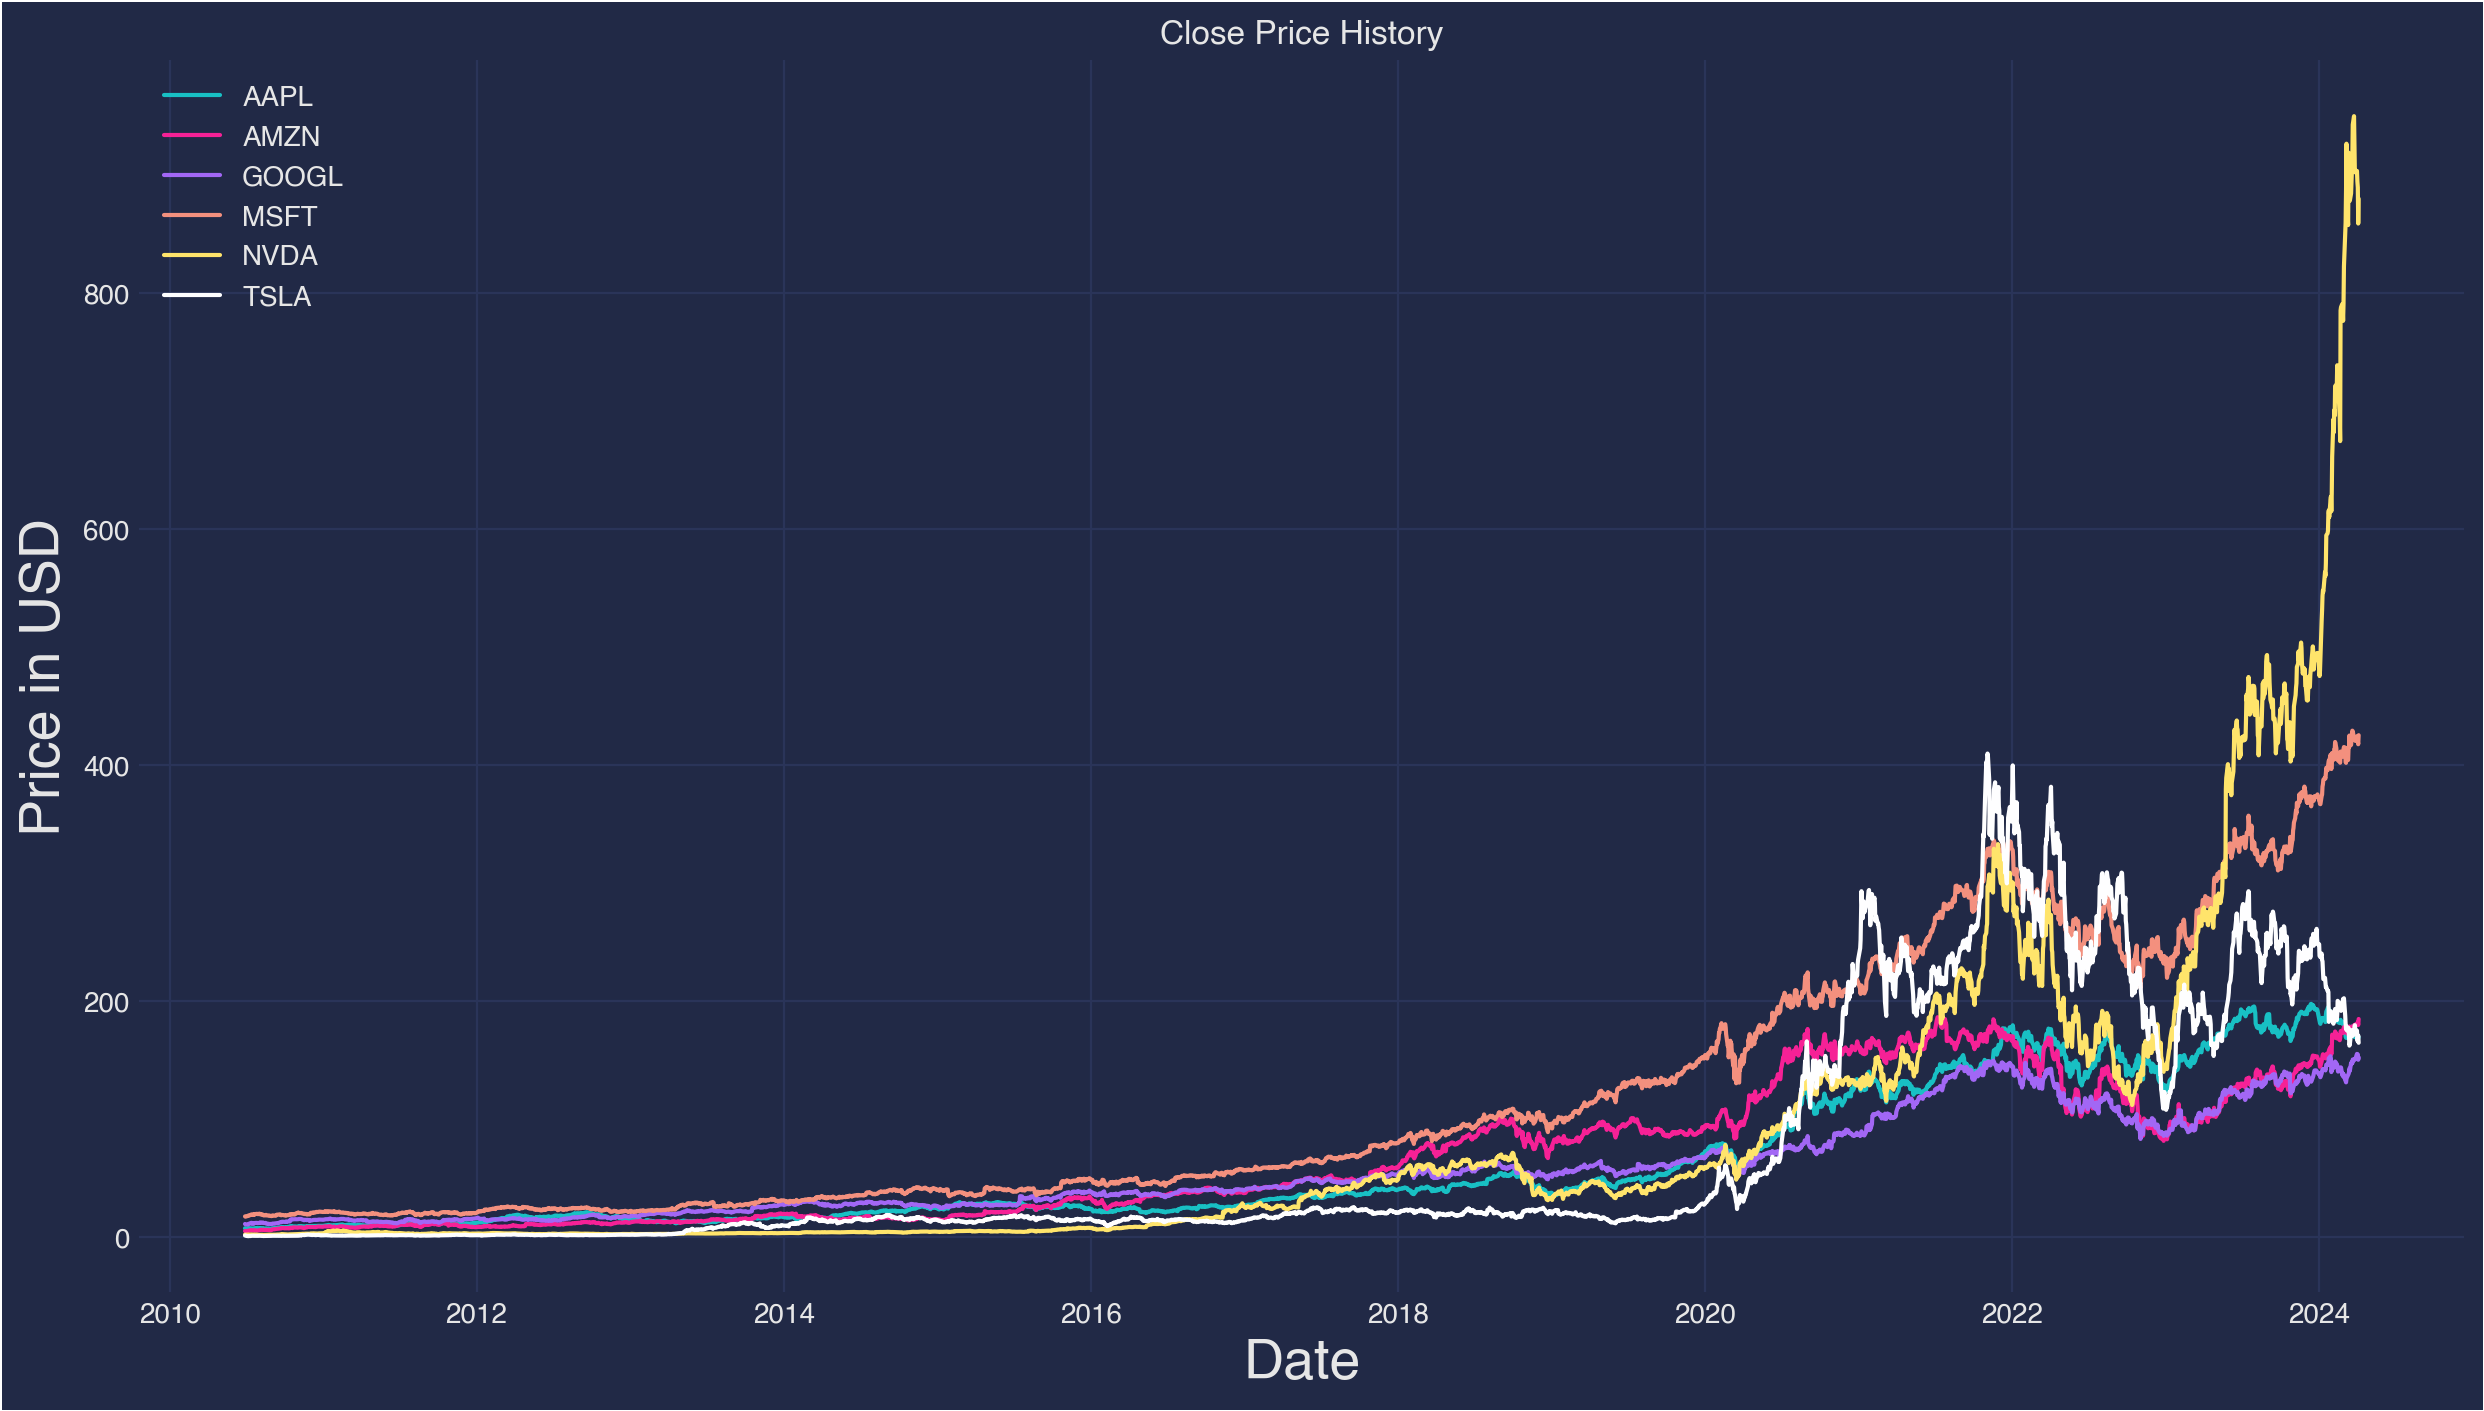

In [12]:
fig, ax = plt.subplots(figsize=(15, 8),linewidth=0.5)
ax.plot(df)
plt.title('Close Price History')
plt.xlabel('Date',fontsize =20)
plt.ylabel('Price in USD',fontsize = 20)
ax.legend(df.columns.values)
plt.show()

In [13]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AAPL,AMZN,GOOGL,MSFT,NVDA,TSLA
AAPL,0.0003,0.0002,0.0002,0.0002,0.0002,0.0002
AMZN,0.0002,0.0004,0.0002,0.0002,0.0003,0.0003
GOOGL,0.0002,0.0002,0.0003,0.0002,0.0002,0.0002
MSFT,0.0002,0.0002,0.0002,0.0003,0.0003,0.0002
NVDA,0.0002,0.0003,0.0002,0.0003,0.0008,0.0004
TSLA,0.0002,0.0003,0.0002,0.0002,0.0004,0.0013


In [14]:
avg_yearly_returns = df.resample('Y').last().pct_change().mean()
avg_yearly_returns

AAPL    0.2686
AMZN    0.3184
GOOGL   0.2176
MSFT    0.2632
NVDA    0.6974
TSLA    0.9209
dtype: float64

In [15]:
annual_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
annual_sd

AAPL    0.2796
AMZN    0.3274
GOOGL   0.2721
MSFT    0.2587
NVDA    0.4461
TSLA    0.5657
dtype: float64

In [16]:
assets = pd.concat([avg_yearly_returns, annual_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.2686,0.2796
AMZN,0.3184,0.3274
GOOGL,0.2176,0.2721
MSFT,0.2632,0.2587
NVDA,0.6974,0.4461
TSLA,0.9209,0.5657


In [17]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [18]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, avg_yearly_returns) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    annual_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(annual_sd)

In [19]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [20]:
portfolios=pd.DataFrame(data)                        
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOGL weight,MSFT weight,NVDA weight,TSLA weight
0,0.4349,0.2678,0.1661,0.2830,0.2163,0.0317,0.1532,0.1498
1,0.4597,0.2680,0.2660,0.0653,0.0435,0.2765,0.1606,0.1881
2,0.5161,0.2944,0.0150,0.2568,0.2018,0.0616,0.2589,0.2059
3,0.5101,0.2858,0.0902,0.1568,0.1002,0.2062,0.2300,0.2166
4,0.5586,0.3064,0.0041,0.1494,0.1759,0.1291,0.2730,0.2685


In [21]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.6886
Volatility     0.3599
AAPL weight    0.0603
AMZN weight    0.0680
GOOGL weight   0.0409
MSFT weight    0.0325
NVDA weight    0.4555
TSLA weight    0.3428
Name: 9572, dtype: float64

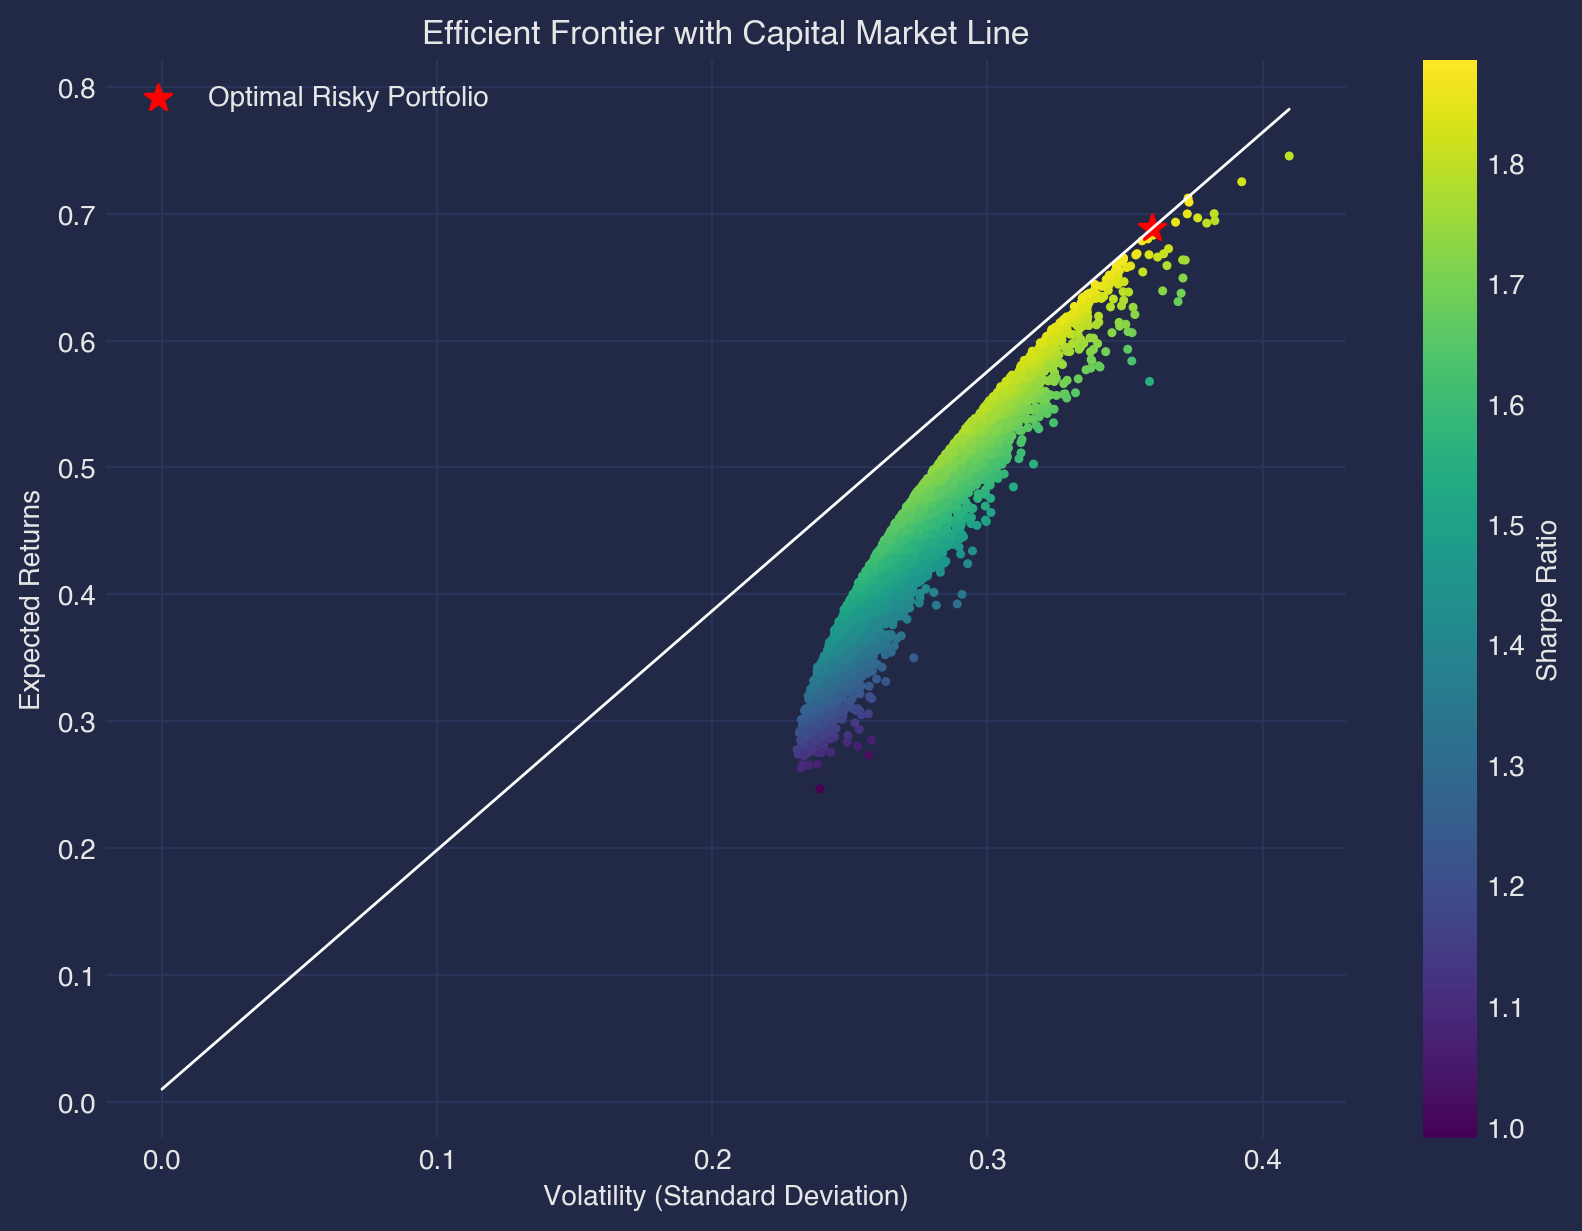

In [22]:
slope = (optimal_risky_port['Returns'] - rf) / optimal_risky_port['Volatility']
volatility_range = np.linspace(0, portfolios['Volatility'].max(), 100)
cml_returns = rf + slope * volatility_range
plt.figure(figsize=(10, 7))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=(portfolios['Returns'] - rf) / portfolios['Volatility'], cmap='viridis', s=5)
plt.colorbar(label='Sharpe Ratio')
plt.plot(volatility_range, cml_returns, color='white', linestyle='-', linewidth=1)
plt.scatter(optimal_risky_port['Volatility'], optimal_risky_port['Returns'], marker='*', color='red', s=100, label='Optimal Risky Portfolio')
plt.title('Efficient Frontier with Capital Market Line')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()